## Study of the vertical heating of the disk! 

In [247]:
%pylab inline
from pygadgetreader import *
from astropy import units as u
from astropy import constants
import octopus as otp
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


## To - Do:

1. Tilt
2. Warp

In [149]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

In [150]:
def angular_momentum(r, v):
    L = np.zeros((len(r),3))
    for i in range(len(r)):
        L[i,:] = np.cross(r[i], v[i])
    return L

In [4]:
path_to_sims = '/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/simulations/'
disk_pos1 = readsnap(path_to_sims+'MW2_40M/MW2UHRvir_000', 'pos', 'disk')
disk_pos2 = readsnap(path_to_sims+'MW2_40M/MW2UHRvir_008', 'pos', 'disk')
disk_pos2_t = readheader(path_to_sims+'MW2_40M/MW2UHRvir_008', 'time')
print(disk_pos2_t)


Returning DISK  Positions
Returning DISK  Positions
3.9999999851


In [231]:
disk_pos1_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_000', 'pos', 'disk')
disk_vel1_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_000', 'vel', 'disk')
disk_pot1_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_000', 'pot', 'disk')


disk_pos2_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_023', 'pos', 'disk')
disk_vel2_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_023', 'vel', 'disk')
disk_pot2_LMC = readsnap(path_to_sims+'LMCMW40M/MWLMC6UHR_023', 'pot', 'disk')


disk_pos2_t_LMC = readheader(path_to_sims+'LMCMW40M/MWLMC6UHR_023', 'time')
print(disk_pos2_t_LMC)

Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities
Returning DISK  Potential
2.29999999516


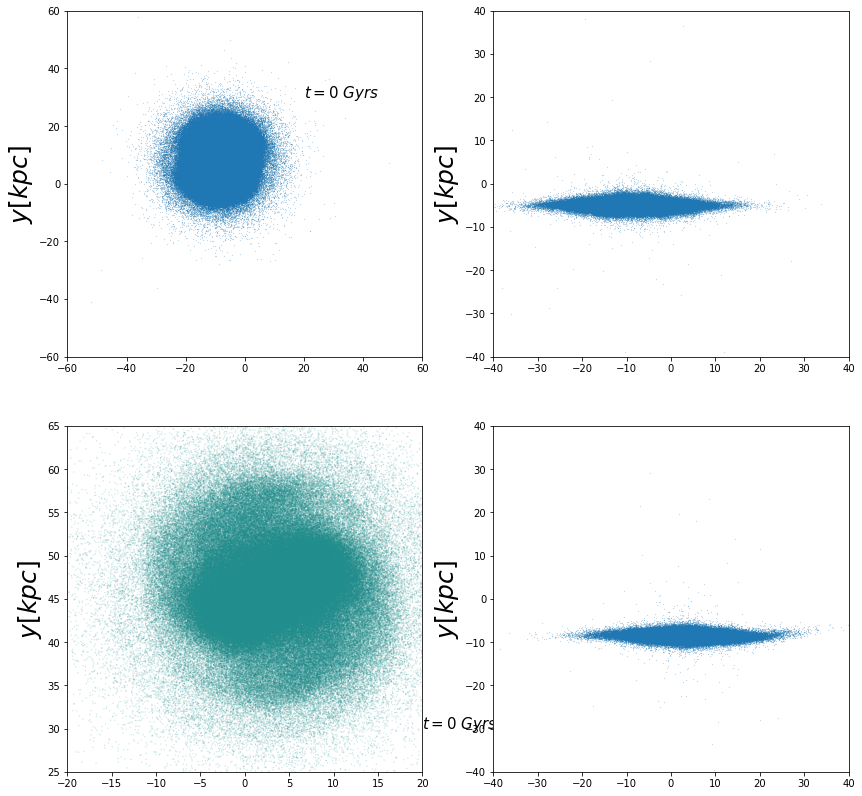

In [25]:
figure(figsize=(14,14))
subplot(2, 2, 1)
scatter(disk_pos2[:,0], disk_pos2[:,1], s=0.01)
xlim(-60, 60)
ylim(-60, 60)
text(20, 30, '$t=0\ Gyrs$', fontsize=15)
ylabel('$y[kpc]$', fontsize=25)

subplot(2, 2, 2)
scatter(disk_pos2[:,0], disk_pos2[:,2], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
ylabel('$z[kpc]$', fontsize=25)
ylabel('$y[kpc]$', fontsize=25)

subplot(2, 2, 3)
scatter(disk_pos2_LMC[:,0], disk_pos2_LMC[:,1], c=((disk_pos2_LMC[:,2] - np.mean(disk_pos2_LMC[:,2]))/np.mean(disk_pos2_LMC[:,2]))
        ,  s=0.01, edgecolors=None)
xlim(-20, 20)
ylim(25, 65)
text(20, 30, '$t=0\ Gyrs$', fontsize=15)
ylabel('$y[kpc]$', fontsize=25)

subplot(2, 2, 4)
scatter(disk_pos2_LMC[:,0], disk_pos2_LMC[:,2] , s=0.01)
xlim(-40, 40)
ylim(-40, 40)
ylabel('$z[kpc]$', fontsize=25)
ylabel('$y[kpc]$', fontsize=25)


## Vertical $<z>$:

In [221]:
def cutting_z(xyz):
    #print(len(xyz))
    index = np.where(np.abs(xyz[:,2] - np.mean(xyz[:,2])) < 2)[0]
    #print(len(index), np.mean(xyz[:,2]))
    return xyz[index]

In [220]:
disk_pos_LMC_f_cut = cutting_z(disk_pos2_LMC)
disk_pos_LMC_i_cut = cutting_z(disk_pos1_LMC)


In [178]:
def mean_z(pos, nbins, xmin, xmax, ymin, ymax):
    disk_mean_h = np.zeros((nbins, nbins))
    x_cuts = np.linspace(xmin, xmax, nbins+1)
    y_cuts = np.linspace(ymin, ymax, nbins+1)

    for i in range(len(x_cuts)-1):
        for j in range(len(y_cuts)-1):
            dxy = np.where((pos[:,0]<x_cuts[i+1]) & (pos[:,0]>x_cuts[i]) 
                           & (pos[:,1]<y_cuts[j+1]) & (pos[:,1]>y_cuts[j]))
            disk_mean_h[i][j] = np.mean(pos[dxy,2]) - mean(pos[:,2])
    return disk_mean_h

In [179]:
disk_mean_h_f = mean_z(disk_pos_LMC_f_cut, 100, -25, 35, 15, 75)

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [180]:
disk_mean_h_i = mean_z(disk_pos_LMC_i_cut, 100, -30, 30, -30, 30)

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


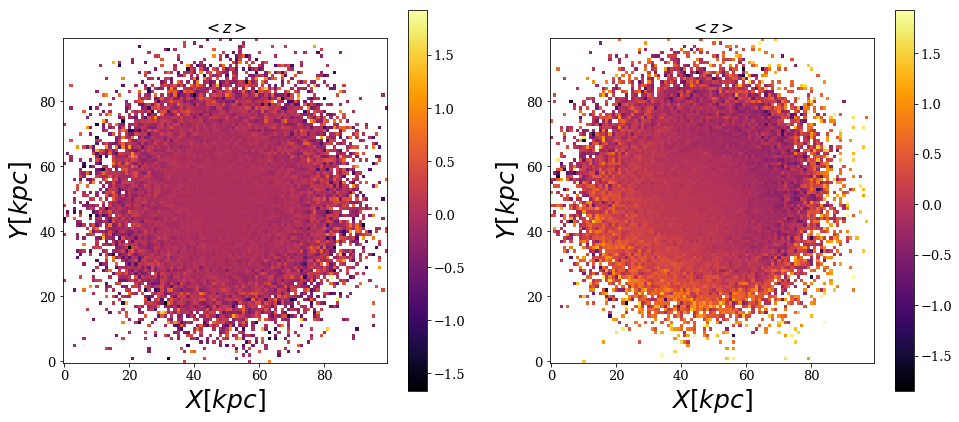

In [216]:
figsize(16,7)
subplot(1, 2, 1)
title('$<z>$')
imshow(disk_mean_h_i.T, origin='lower', cmap='inferno')
colorbar()
xlabel('$X[kpc]$', fontsize=25)
ylabel('$Y[kpc]$', fontsize=25)

subplot(1, 2, 2)
title('$<z>$')
imshow(disk_mean_h_f.T, origin='lower', cmap='inferno')
colorbar()
xlabel('$X[kpc]$', fontsize=25)
ylabel('$Y[kpc]$', fontsize=25)


## Tilt: 

In [233]:
cm_disk_i = otp.CM_disk_potential(disk_pos1_LMC, disk_vel1_LMC, disk_pot1_LMC)
cm_disk_f = otp.CM_disk_potential(disk_pos2_LMC, disk_vel2_LMC, disk_pot2_LMC)
print(cm_disk_i, cm_disk_f)

(array([ 0.01250752, -0.00444955, -0.00144901]), array([ 0.52021529,  1.84721903,  0.02311298])) (array([  3.14101405,  46.01270058,  -8.49866672]), array([  9.34042905,  31.41704268, -47.98832366]))


In [235]:
def re_center(xyz, vxyz, rcm, vcm):
    xyz_c = copy(xyz)
    vxyz_c = copy(vxyz)
    for i in range(3):
        xyz_c[:,i] = xyz[:,i] - rcm[i]
        vxyz_c[:,i] = vxyz[:,i] - vcm[i]
    return(xyz_c, vxyz_c)

In [222]:
def cutting_z_velocity(xyz, vxyz, cm):
    
    #print(len(xyz))
    index = np.where((np.abs(xyz[:,2] - np.mean(xyz[:,2])) < 2) & )[0]
    #print(len(index), np.mean(xyz[:,2]))
    return xyz[index], vxyz[index]

In [224]:
disk_pos_LMC_f_cut, disk_vel_LMC_f_cut  = cutting_z_velocity(disk_pos2_LMC, disk_vel2_LMC)
disk_pos_LMC_i_cut, disk_vel_LMC_i_cut  = cutting_z_velocity(disk_pos1_LMC, disk_vel1_LMC)


In [236]:
disk_pos_LMC_f_cut_cm, disk_vel_LMC_f_cut_cm = re_center(disk_pos_LMC_f_cut, disk_vel_LMC_f_cut, 
                                                         cm_disk_f[0], cm_disk_f[1])

(-40, 40)

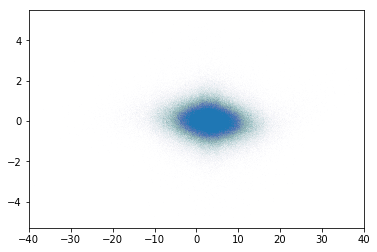

In [91]:
scatter(disk_pos_LMC_f_cut[:,0], disk_pos_LMC_f_cut[:,2]-np.mean(disk_pos_LMC_f_cut[:,2]), s=0.01, edgecolors='None')
xlim(-40, 40)


In [237]:
L_disk_f = angular_momentum(disk_pos_LMC_f_cut, disk_vel_LMC_f_cut)
L_disk_f_cm = angular_momentum(disk_pos_LMC_f_cut_cm, disk_vel_LMC_f_cut_cm)

L_disk_i = angular_momentum(disk_pos_LMC_i_cut, disk_vel_LMC_i_cut)

In [239]:
Lx_f = sum(L_disk_f[:,0])/len(L_disk_f)
Ly_f = sum(L_disk_f[:,1])/len(L_disk_f)
Lz_f = sum(L_disk_f[:,2])/len(L_disk_f)

Lx_f_cm = sum(L_disk_f_cm[:,0])/len(L_disk_f_cm)
Ly_f_cm = sum(L_disk_f_cm[:,1])/len(L_disk_f_cm)
Lz_f_cm = sum(L_disk_f_cm[:,2])/len(L_disk_f_cm)


Lx_i = sum(L_disk_i[:,0])/len(L_disk_i)
Ly_i = sum(L_disk_i[:,1])/len(L_disk_i)
Lz_i = sum(L_disk_i[:,2])/len(L_disk_i)

print(Lx_f, Ly_f, Lz_f)
print(Lx_f_cm, Ly_f_cm, Lz_f_cm)

print(Lx_i, Ly_i, Lz_i)

-1930.66655223 88.771275241 895.211278377
13.1371650047 16.3760959225 1222.21232165
0.392667272278 -0.183359121096 1220.16384645


In [264]:
L_f = np.array([Lx_f_cm, Ly_f_cm, Lz_f_cm])
L_i = np.array([Lx_i, Ly_i, Lz_i])
print(L_f/linalg.norm(L_f), L_i/linalg.norm(L_i))

[ 0.01074709  0.01339676  0.9998525 ] [  3.21815180e-04  -1.50274170e-04   9.99999937e-01]


In [265]:
Li_dot_Lf = (np.dot(L_i/linalg.norm(L_i), L_f/linalg.norm(L_f))/linalg.norm(L_f)) 
arccos(Li_dot_Lf / linalg.norm(L_f))* 180/np.pi

89.999961661269225

In [263]:
np.arccos(Li_dot_Lf)*180/np.pi

89.95313482442873

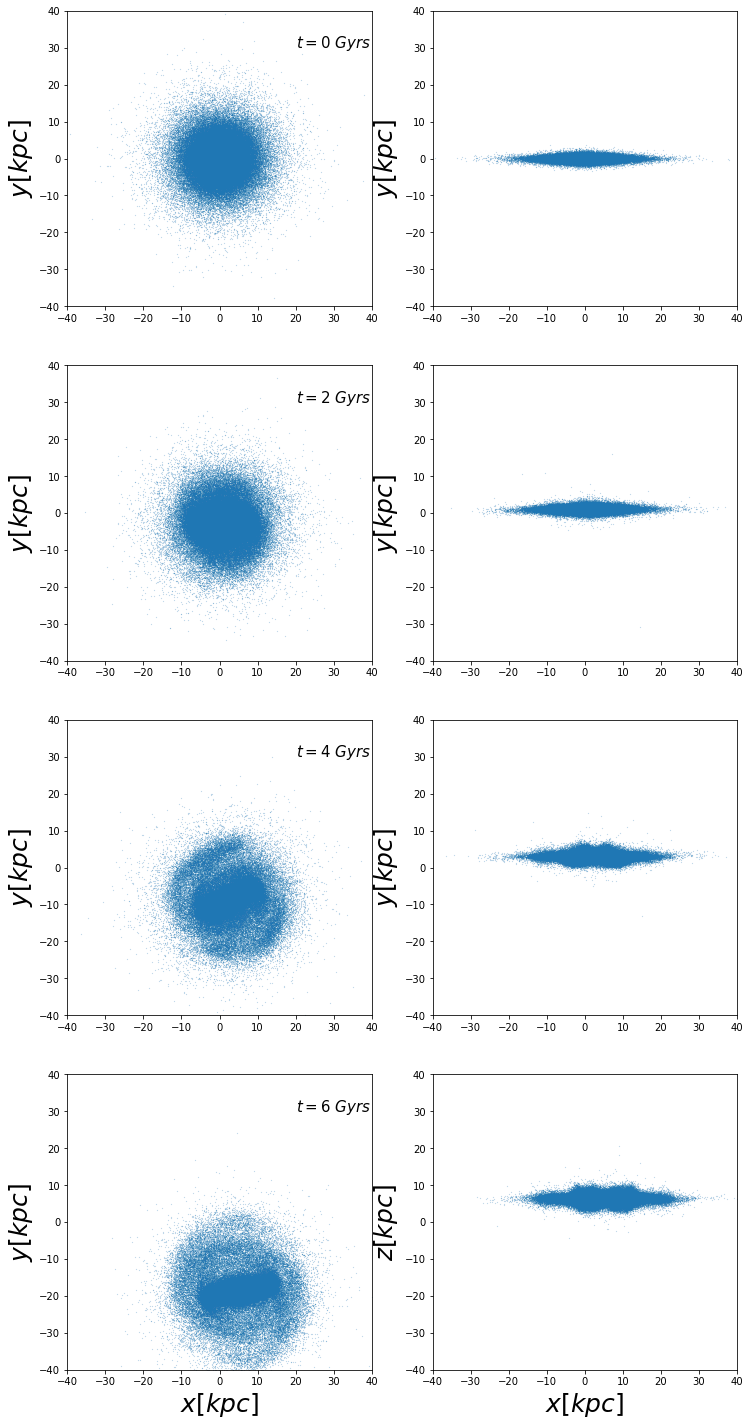

In [44]:
figsize(12,25)
subplot(4, 2, 1)
scatter(disk_pos1[:,0], disk_pos1[:,1], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
text(20, 30, '$t=0\ Gyrs$', fontsize=15)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 2)
scatter(disk_pos1[:,0], disk_pos1[:,2], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
ylabel('$z[kpc]$', fontsize=25)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 3)
scatter(disk_pos2[:,0], disk_pos2[:,1], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
text(20, 30, '$t=2\ Gyrs$', fontsize=15)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 4)
scatter(disk_pos2[:,0], disk_pos2[:,2], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 5)
scatter(disk_pos3[:,0], disk_pos3[:,1], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
text(20, 30, '$t=4\ Gyrs$', fontsize=15)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 6)
scatter(disk_pos3[:,0], disk_pos3[:,2], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
ylabel('$y[kpc]$', fontsize=25)


subplot(4, 2, 7)
scatter(disk_pos4[:,0], disk_pos4[:,1], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
text(20, 30, '$t=6\ Gyrs$', fontsize=15)
xlabel('$x[kpc]$', fontsize=25)
ylabel('$y[kpc]$', fontsize=25)

subplot(4, 2, 8)
scatter(disk_pos4[:,0], disk_pos4[:,2], s=0.01)
xlim(-40, 40)
ylim(-40, 40)
xlabel('$x[kpc]$', fontsize=25)
ylabel('$z[kpc]$', fontsize=25)
